# Spectrogram generation

In [2]:
import os
import sys

# path

In [4]:
print(os.getcwd())

C:\Users\Administrator-1\HI


In [5]:
training_data_kok14_galfa = os.path.join(os.getcwd(),"data", "other", "training_data_kok14_galfa.pickle")

# Libraries

In [6]:

from __future__ import print_function, division
from astropy.io          import fits
from astropy             import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import math

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets
from torch.optim.lr_scheduler import LambdaLR, StepLR, MultiStepLR, ExponentialLR
import os
import argparse

import glob
import pickle

# Data preparation

In [8]:
data = pickle.load(open(training_data_kok14_galfa, 'rb'))

# training data
X_train = data['X_train']
Y_train = data['Y_train']
# Observed test data
X_test = data['X_test']
Y_test = data['Y_test']

In [10]:
print("x_train = ", X_train.shape)
print("Y_train = ", Y_train.shape)
print("X_test = ", X_test.shape)
print("Y_test = ", Y_test.shape)

x_train =  (38781, 414)
Y_train =  (38781, 2)
X_test =  (58, 414)
Y_test =  (58, 2)


# Plot few spectra gram

In [11]:
#plt.specgram(x, Fs = 1)

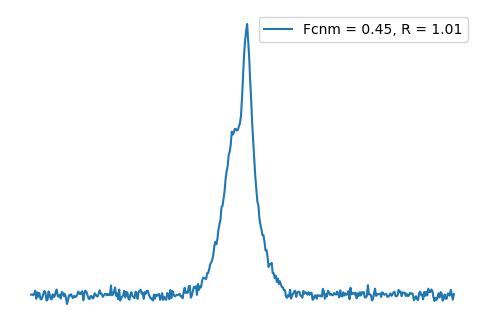

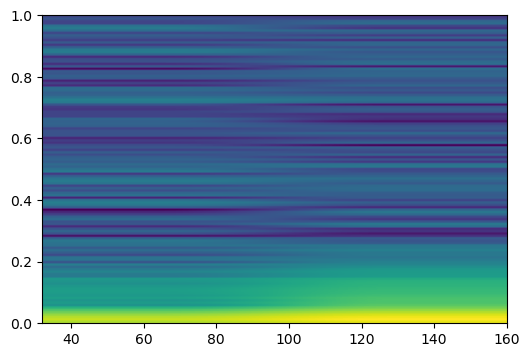

In [44]:

x = X_train[0, :]
plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')
plt.legend()
plt.axis('off')
#plt.show()

# Spectrum in training set
plt.figure(figsize=(6,4))
plt.specgram(x)
#plt.axis('off')
plt.show()



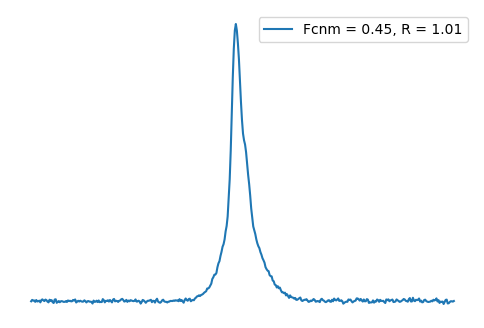

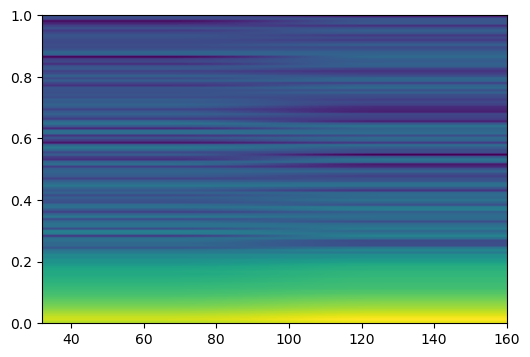

In [45]:
x = X_train[1000, :]

plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')
plt.legend()
plt.axis('off')
#plt.show()


plt.figure(figsize=(6,4))
plt.specgram(x)
#plt.axis('off')
plt.show()

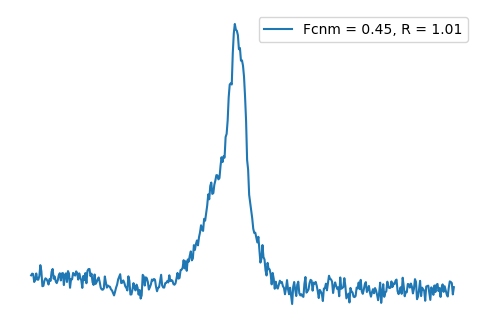

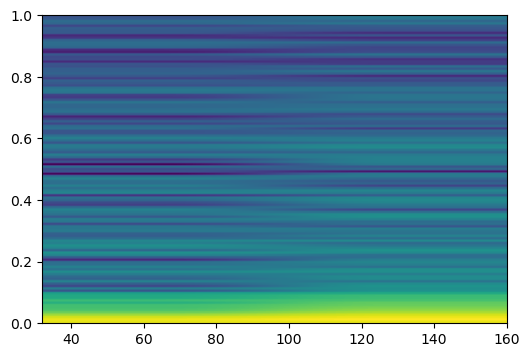

In [46]:
x = X_train[30000, :]
plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')
plt.legend()
plt.axis('off')
#plt.show()

plt.figure(figsize=(6,4))
plt.specgram(x)
#plt.axis('off')
plt.show()

# Save spectra gram

training set

In [48]:
validation_size=6000

In [ ]:
for i in range(0, X_train.shape[0]-validation_size):
    x = X_train[i]
    plt.figure(figsize=(6,4))
    plt.specgram(x)
    plt.axis('off')
    #plt.plot(x, label=f'Fcnm = {round(Y_train[10000,0], 2)}, R = {round(Y_train[10000,1], 2)}')
    plt.savefig(f'C:\\Users\\Administrator-1\\Desktop\\images_test\\{i}.jpg')
    plt.clf()
    plt.close()
print('Done.')

validation set

In [ ]:
for i in range(X_train.shape[0]-validation_size, X_train.shape[0]):
    x = X_train[i]
    plt.figure(figsize=(6,4))
    plt.specgram(x)
    plt.axis('off')
    #plt.plot(x, label=f'Fcnm = {round(Y_train[10000,0], 2)}, R = {round(Y_train[10000,1], 2)}')
    plt.savefig(f'C:\\Users\\Administrator-1\\Desktop\\images_test\\{i}.jpg')
    plt.clf()
    plt.close()
print('Done.')

Testing set

In [ ]:
for i in range(0, X_test.shape[0]):
    x = X_test[i]
    plt.figure(figsize=(6,4))
    plt.specgram(x)
    plt.axis('off')
    #plt.plot(x, label=f'Fcnm = {round(Y_train[10000,0], 2)}, R = {round(Y_train[10000,1], 2)}')
    plt.savefig(f'C:\\Users\\Administrator-1\\Desktop\\images_test\\{i}.jpg')
    plt.clf()
    plt.close()
print('Done.')